In [25]:
%%HTML  
<style>div.prompt {display:none}</style>

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import mpld3
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [27]:
#http://www.statsci.org/data/general/fev.html
'''
Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). 
Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. 
The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. 
The data are part of a larger study to follow the change in pulmonary function over time in children.
'''

full_df = pd.read_csv('../../../data/forced_expetory_volume.txt', 
            sep='\t',
          )
#Female 0, Male 1
#NoSmoke 0, Smoke 1
full_df.head()

,Unnamed: 0,ID,Age,FEV,Height,Sex,Smoker
0,0,301,9,1.708,57.0,0,0
1,1,451,8,1.724,67.5,0,0
2,2,501,7,1.720,54.5,0,0
3,3,642,9,1.558,53.0,1,0
4,4,901,9,1.895,57.0,1,0


[ 0.00021834  0.05526122  0.10390746  0.15833512 -0.09332785]
0.167970073788
0.776231433045
0.31135848548
0.25481235253
0.776231433045


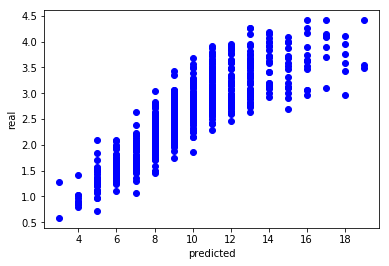

In [29]:
lm = LinearRegression()
X = full_df.drop(['FEV', 'ID'], axis=1) #take out the output, and ID since ID isnt data
Y = full_df['FEV'] #keep only the output variable FEV
fit = lm.fit(X, Y) #make a model fit


print(fit.coef_) # coefficients of the X's


prediction = lm.predict(X) #make a prediction


from sklearn import metrics #use metric to get the model stats

exp_v = metrics.explained_variance_score(Y, prediction)	#Explained variance regression score function
mar = metrics.mean_absolute_error(Y, prediction)	#Mean absolute error regression loss
mse = metrics.mean_squared_error(Y, prediction)	#Mean squared error regression loss
mae = metrics.median_absolute_error(Y, prediction)	#Median absolute error regression loss
r2 = metrics.r2_score(Y, prediction)	#R^2 (coefficient of determination) regression score function.

print(mse) # not relative, must know the range to be able to interperet
print(exp_v) # basically R2 but takes into account the mean of the error
print(mar)
print(mae)
print(r2) # sometimes called the coefficient of determination

#https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

plt.plot(X['Age'], prediction,'bo')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

#this should our prediction is pretty good, since the data follows a cohesive pattern

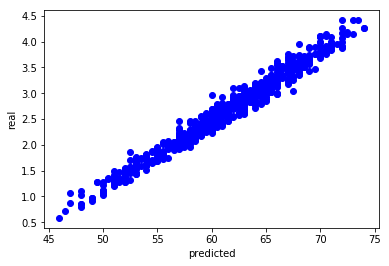

In [30]:
plt.plot(X['Height'], prediction,'bo')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

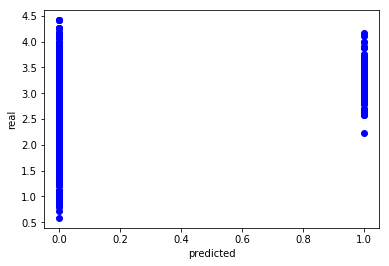

In [31]:
plt.plot(X['Smoker'], prediction,'bo')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [36]:
coef_df = pd.DataFrame(list(zip(full_df.columns, fit.coef_)), columns = ['Features', 'Coefficients'])
print(coef_df)
print(fit.coef_) #these two are the same
print(fit.score(X,Y)) #this is just R2

     Features  Coefficients
0  Unnamed: 0      0.000218
1          ID      0.055261
2         Age      0.103907
3         FEV      0.158335
4      Height     -0.093328
[ 0.00021834  0.05526122  0.10390746  0.15833512 -0.09332785]
0.776231433045


    Test the coefs by graphing against the output, we should see a correlated increase which we do
    
    we can color the graph red for the dots that are smokers and see if we see anything, but since the coef correlation is is low, it seems unlikely
    
    after graphing with the red dots, we can see that the only reasonable conclusing we can draw is that the older you get, the more likely you are to smoke
    
    this is only a small slice of a much larger dataset, so conclusions shouldn't be drawn from this analysis

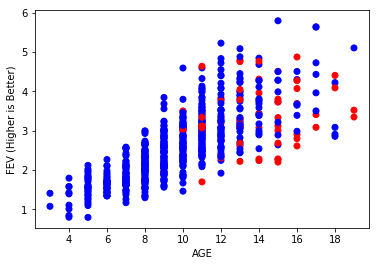

In [39]:
colors = ['red' if full_df['Smoker'][idx]==1 else 'blue' for idx,x in enumerate(full_df['Age'])]
plt.scatter(full_df['Age'], full_df['FEV'], c=colors)
plt.xlabel("AGE")
plt.ylabel("FEV (Higher is Better)")


smoker_list = []
nonsmoker_list = []
for idx, x in enumerate(full_df['FEV']):
    if(full_df['Age'][idx] > 15):
        if(full_df['Smoker'][idx] == 1):
            smoker_list.append(x)
        else:
            nonsmoker_list.append(x)
    
#researchers said in the paper that they noticed a trend for smoking/non-smoking (data for parents is redacted)
#its hard for us to see here , appearing mostly random

In [34]:
#now for some cross validation
xtrain, xtest, ytrain, ytest = sk.model_selection.train_test_split(X, Y, test_size=.50)
#make a fit to the training data
modeler = LinearRegression()
modeler.fit(xtrain,ytrain)

prediction_train = modeler.predict(xtrain)
prediction_test = modeler.predict(xtest)
mse_train = np.mean((ytrain - prediction_train)**2)

mse_test = np.mean((ytest - prediction_test)**2)

print("MSE_TRAIN: ", mse_train)
print("MSE_TEST: ", mse_test)

MSE_TRAIN:  0.164037407121
MSE_TEST:  0.174145465925


(327, 5)
(327,)
(327, 5)
(327,)


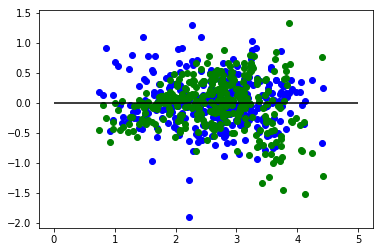

In [35]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

plt.scatter(prediction_test, prediction_train - ytrain, c='b')
plt.scatter(prediction_test, prediction_test - ytest, c='g')
plt.hlines(y=0,xmin=0, xmax=5)

Graph looks pretty good, a random spread around the mean, thats a good sign